In [47]:
%matplotlib inline
from ipy_setup import setup
setup()

### Getting started
Python is a general-purpose programming language with many powerful open-source libraries for research computing. This will be a beginner tutorial describing how to set up the scientific Python environment on your computer and perform common research tasks.

Installing and managing the third-party libraries can be difficult, so I would recommend instead installing the [Anaconda distribution](http://continuum.io/downloads) with a number of useful packages already included (a full list [here](http://docs.continuum.io/anaconda/pkg-docs)). Choose the version for your operating system. For now, you'll want the Python 2.7 version, because some useful scientific packages may not be compatible with Python 3 yet.

Once the download completes, you should see a new program called the Anaconda Launcher. You can run this to access [Spyder](https://pythonhosted.org/spyder/), the interactive development environment (IDE) included with the installation. Spyder should open a new Python file (.py), where you can run:

In [48]:
print("hello world!")

hello world!


In general you should be able to copy and paste any code from this tutorial into your file and run it. When you have this file open (call it `helloworld.py` for example) and press "Run" in the Spyder interface, behind the scenes Spyder is calling `python helloworld.py`. In other words, it is running the Python interpreter on your file to execute the code you wrote. Importantly, Spyder is not the only way to run Python code! There are other IDEs out there, and you could even use a simple text editor and call the interpreter yourself from the command line. You may want to explore other editors/IDEs as you get more comfortable with the language.

### The basic language

Even without the scientific packages, Python provides readable, easy-to-use variables and data structures. You do not need to specify the type when defining a variable:

In [49]:
a = 5
b = 10.0
c = 'this is a string'

You can define lists (an ordered collection of items, which do not need to have the same type) and loop over them like this:

In [50]:
L = [10.0, 3.0, 'some words', 2]
for item in L:
    print(item)

10.0
3.0
some words
2


Specific items (or ranges of items) can be accessed with indices. In Python, indices start counting at 0, not 1.

In [51]:
print(L[1])
print (L[2:])

3.0
['some words', 2]


Lists may look like vectors, but in general they are too slow to use for scientific computing applications. NumPy, which we'll talk about later, is a package that solves this issue.

Another powerful data structure in Python is the dictionary, which is a set of key-value pairs:

In [68]:
person = {'name': 'Terry', 'age': 42, 'weight': 160}

print('This person is named ' + person['name'] + ' and they are ' + str(person['age']) + ' years old')

This person is named Terry and they are 42 years old


Dictionaries are useful when you have objects that are identified by strings/keys rather than a particular order. Lookups are very fast because you don't have to search for items. Dictionaries are a good way to handle data in your program, even more complicated objects like matrices, because the items are easy to access.

Finally, you can define your own functions:

In [53]:
def square(x):
    return x**2

print(square(5))

25


This is only a very short overview of the Python language, and I skipped over many useful features. If you want to learn more, I'd recommend following the very good [Learn Python the Hard Way](http://learnpythonthehardway.org/book/).

###NumPy and Matplotlib

NumPy is a package used for matrix operations, and Matplotlib provides a Matlab-like plotting interface. These packages are extremely common, and anyone using Python for research will be familiar with them. Let's import NumPy and create a 2-D matrix:

In [54]:
import numpy as np
M = np.array([[1, 2, 3], [4, 5, 6]])
print(M)

[[1 2 3]
 [4 5 6]]


It's standard to import packages as a shortened prefix to access their functions (as opposed to `from numpy import *`) because some packages may have conflicting function names. With the prefix `np`, we know the functions are from NumPy.

Normally you will not be typing out matrices by hand. It's much more common to load matrices from files, for example plain text files where the values are separated by spaces, commas (.csv) or tabs (.tsv). The separating character is called the delimiter. Here's an example of loading the monthly time series of [full natural flows into Folsom Reservoir](./data/folsom-FNF.txt):

In [55]:
Q = np.loadtxt('data/folsom-FNF.txt', delimiter=' ', skiprows=1)

The `skiprows` parameter just allows a header line with non-numerical values to be ignored. Now that we have the Q matrix loaded into memory, let's plot the time series of April inflows:

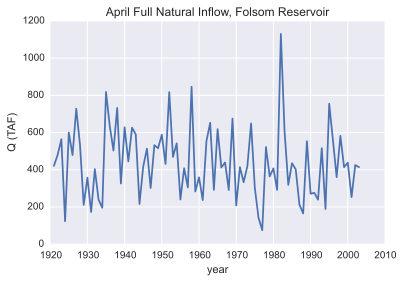

In [56]:
import matplotlib.pyplot as plt
years = Q[:,0] # first column
april = Q[:,7]
plt.plot(years, april) # could also do plt.bar(years, april) for a bar plot
plt.xlabel('year')
plt.ylabel('Q (TAF)')
plt.title('April Full Natural Inflow, Folsom Reservoir')
plt.show()

Easy! If you want to save a figure, use `plt.savefig('april-fnf.svg')`. The filetype will be recognized by the extension. You can also save as raster types like PNG. There are many, many plot types supported by Matplotlib (and the flexibility to invent new ones yourself!) [This Github repository](https://github.com/VictoriaLynn/plotting-examples) contains a few nice examples, including Matlab/R versions.

We can also do simple matrix operations on our matrix of inflow data. It's important to do this using NumPy functions rather than looping over the matrix indices (which is much, much slower). Let's plot the minimum, mean, and maximum for each month:

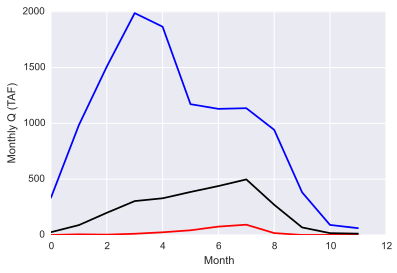

In [57]:
# exclude the first column (years) and the last (total)
# and use axis=0 (operate over the rows, not columns)
mins = Q[:,1:13].min(axis=0) # important: indices 1:13 does not include 13
maxes = Q[:,1:13].max(axis=0)
means = Q[:,1:13].mean(axis=0)
plt.plot(range(12), mins, color='r') # range(n) returns a list [0, 1, 2, ..., n]
plt.plot(range(12), means, color='k')
plt.plot(range(12), maxes, color='b')
plt.ylabel('Monthly Q (TAF)')
plt.xlabel('Month')
plt.show()

This isn't pretty (it needs a legend, and month labels on the x-axis) but you get the general idea. One last plot before we move on -- let's make an exceedance curve for the total annual inflow. This is included in the last column of the matrix already, but it gives us an excuse to use `np.sum`:

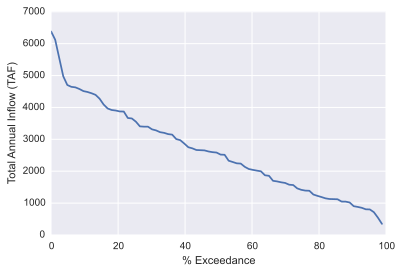

In [58]:
Qtotal = Q[:,1:13].sum(axis=1) # summing over columns here
N = len(Qtotal) # number of data points
plt.plot(np.arange(N)/float(N)*100, np.sort(Qtotal)[::-1]) # must divide by float not int
# The list index [::-1] reverses the list (the format is start:stop:step, so -1 is the step)
plt.xlabel('% Exceedance')
plt.ylabel('Total Annual Inflow (TAF)')
plt.show()

###Optimization

There are several packages for linear, nonlinear, and quadratic programming in Python. These solvers are typically not written in Python, but provide an interface to a library in a compiled language (C/C++/Fortran).

For linear programming, a few good options are [CVXOPT](http://cvxopt.org/) or [PuLP](https://pythonhosted.org/PuLP/). I'll use `CVXOPT` in these examples because it also provides a quadratic solver. `CVXOPT` should be included with your Anaconda installation, but if not, you can install it from the command line with `pip install cvxopt`.

`CVXOPT` requires costs and constraints in matrix form:

$\min_{x} \mathbf{c}^T \mathbf{x}$

s.t.: $\mathbf{Ax} \leq \mathbf{b}$

Here is an example problem from the [CVXOPT documentation](http://cvxopt.org/examples/tutorial/lp.html):

$\min_{x} 2x_1 + x_2$

s.t.: $-x_1 + x_2 \leq 1$

$x_1 + x_2 \geq 2$

$x_2 \geq 0$

$x_1 - 2x_2 \leq 4$

After rearranging the constraints to be "less-than", the problem can be solved like this:

In [89]:
from cvxopt import matrix, solvers
A = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
b = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
sol=solvers.lp(c,A,b)


     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


Note that `CVXOPT` has a different matrix object type than NumPy. They are compatible, but if you have a NumPy matrix `M`, you must give `matrix(M)` to the solver. Let's look at what's returned in the solution `sol`:

In [90]:
print sol

{'status': 'optimal', 'dual slack': 3.52991597261758e-09, 'iterations': 5, 'residual as primal infeasibility certificate': None, 'relative gap': 5.589978335954566e-08, 'dual objective': 2.499999981731255, 'residual as dual infeasibility certificate': None, 'gap': 1.3974945737764525e-07, 's': <4x1 matrix, tc='d'>, 'primal infeasibility': 1.136878642020135e-08, 'dual infeasibility': 2.257879009446063e-08, 'primal objective': 2.4999999895543077, 'primal slack': 2.038839954752444e-08, 'y': <0x1 matrix, tc='d'>, 'x': <2x1 matrix, tc='d'>, 'z': <4x1 matrix, tc='d'>}


This is a dictionary with several keys. The optimal decision variables are contained in `sol['x']`. The optimal objective value is contained in `sol['primal objective']`. The values of the slack variables are contained in `sol['s']`, and the dual variables are given by `sol['z']`. Note that values with `e-08` can be treated as zero here.

In [91]:
print(sol['x'])
print(sol['z'])

[ 5.00e-01]
[ 1.50e+00]

[ 5.00e-01]
[ 1.50e+00]
[ 5.01e-08]
[ 3.53e-09]



We can also solve quadratic programs with `CVXOPT`. Again, the costs and constraints are expected to be in matrix form:

$\min_{x} \frac{1}{2}\mathbf{x}^T \mathbf{P} \mathbf{x} + \mathbf{q}^T\mathbf{x}$

s.t.: $\mathbf{Gx} \leq \mathbf{h}$

$\mathbf{Ax} = \mathbf{b}$

If we take the [CVXOPT example](http://cvxopt.org/examples/tutorial/qp.html) for quadratic programming, we can define matrices for the coefficients and solve the problem in the same way as the linear program above:

$\min_{x} 2x_1^2 + x_2^2 + x_1x_2 + x_1 + x_2$

s.t.: $x_1 \geq 0$

$x_2 \geq 0$

$x_1 + x_2 = 1$


In [92]:
from cvxopt import matrix, solvers
Q = 2*matrix([ [2, .5], [.5, 1] ])
p = matrix([1.0, 1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])
A = matrix([1.0, 1.0], (1,2))
b = matrix(1.0)
sol=solvers.qp(Q, p, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  3e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  1e-16  5e-08
Optimal solution found.


In [93]:
print(sol['x'])
print(sol['primal objective'])
print(sol['z'])

[ 2.50e-01]
[ 7.50e-01]

1.875
[ 3.91e-07]
[ 1.00e-08]



Finally, for general non-linear programming (gradient-based search for local optima), refer to `scipy.optimize`. SciPy is another package that you can expect to be included in most research analyses. [Here is an example](https://scipy-lectures.github.io/intro/scipy.html#optimization-and-fit-scipy-optimize) of defining a general smooth function `f(x)` and performing a gradient-based optimization starting from a given point.

Let's try this for the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function), which has a global minima at $f(1,1)=0$:

In [98]:
def rosenbrock(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

from scipy import optimize
optimize.fmin_bfgs(rosenbrock, [0,3])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 120
         Gradient evaluations: 30


array([ 0.99999569,  0.99999136])

This will only find local minima in the case of a multimodal function. Here we did not provide a function for the gradient; it's being estimated numerically during the search. If the gradient function is known, it can be passed into the function using the `fprime` keyword.

###Todo
- Pandas: Time series (get annual peak flows from daily)
- Scipy: stats and optimize, fitting distributions and random numbers